In [8]:
import skimage.io
import numpy as np
#change 'batman copy.png' to whatever your file name is
im = skimage.io.imread('blindness.png', flatten=True)
#im = scipy.ndimage.imread('amy.jpg')

In [236]:
rows, num_cols = im.shape
rows, num_cols

(339, 442)

Find all the rows which are not all white

In [237]:
all_ones = np.ones((num_cols,1),dtype=np.int32)
#sum up all the values
lines = np.dot(im, all_ones).reshape((1,-1))[0]
txt_lines = np.where(lines < num_cols)[0]

Group the indices as bands.

This is an amusing excercise in vectorisation :)

In [239]:
diff = np.roll(txt_lines,-1) - txt_lines
starts = np.where(abs(diff) > 1)[0]
ends = starts - np.ones_like(starts)
starts[-1] = 0
starts = np.roll(starts,1)
bands = zip(starts,ends)

- we'll need the size of the widest band.
- maybe I should just pad the bands to this but 

In [254]:
max_width = max(j-i for i,j in bands)

So this is an intermediate image

In [ ]:
from  random import randint

#get rid of blank spaces
new_im = np.ones((len(txt_lines), num_cols))
for i,j in enumerate(txt_lines):
    new_im[i,:] = im[j,:]

#this is a greyscale lightening with linear interpolation
num_bands = len(bands)
for k, pair in enumerate(bands):
    i, j = pair
    t = 1 - float(k)/num_bands
    new_im[i:j+1,:] = .75*t + new_im[i:j+1,:]*(1-.75*t)

This is worth investigating

http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/

In [290]:

#set up the indexes for the widest possible band
max_width = max(j-i for i,j in bands)
x = np.array(range(num_cols))
y = np.array(range(max_width +1))
xm, ym = np.meshgrid(x, y)

for k, pair in enumerate(bands):
    i, j = pair
    mid_pt = (j-i)/2. 
    #truncate from the indexes for the widest band
    xx, yy = xm[:j-i+1,:], ym[:j-i+1,:]
    if True: 
        #each band has it's own period and phase
        period, phase = float(10 + randint(0,5)), randint(0,5)
        ts = xx/period + phase
        yy = np.int32( mid_pt + (1.4 + .6*np.sin(ts))*(yy - mid_pt) )
        #truncate if outside the band
        yy[yy>(j-i)] = 0
        yy[yy<0] = 0
        #xx = np.int32( bb*(xx / bb) + (xx % bb )**1.3 /float(bb)**.3 )
  
    old_band = np.copy(new_im[i:j+1,:]).flatten()
    #I really don't know why this is automatically reshaped
    nn_im[i:j+1,:] = old_band[xx + num_cols*yy]
 
skimage.io.imsave('ppr.png', 
                  nn_im ,
                  plugin=None)

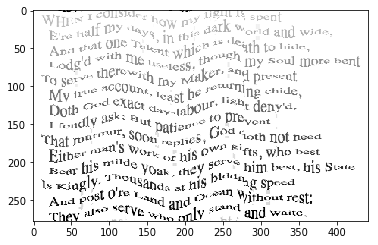

In [291]:
from scipy.misc import face
import numpy as np
import matplotlib.pyplot as plt

img = np.copy(nn_im)

A = max_width/2
w = np.pi * 6.0 / img.shape[1]
ff = -.75 / img.shape[1]

shift = lambda i: A*np.exp( ff*abs(i-img.shape[1]/2)) * np.sin( i*w)

for i in range(img.shape[0]):
    img[:,i] = np.roll(img[:,i], int(shift(i)))

plt.imshow(img, cmap=plt.cm.gray)
plt.show()